<a href="https://colab.research.google.com/github/jivitheshreddy/INFO-5731-Srping2023/blob/main/In_class_exercise_03_02282023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (2/28/2023, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

Text classification might be an intriguing use of sentiment analysis. Natural language processing (NLP) techniques are used in sentiment analysis to ascertain the sentiment in customers product reviews. Based on the emotion expressed in the text, sentiment analysis attempts to categorize evaluations as either good, negative, or neutral.The following features types are considered in building the machine learning model:
1. Bag-of-Words (BoW): A representation of the text as a collection of individual words or terms without any regard to their order or position in the text.
2. n-grams: A sequence of n consecutive words in the text, which can capture the context of the words and the sentiment expressed in them.
3. Word cloud
4. Frequency distribution 
5. Sentence count (the number of sentences in the document) 


Question 2 (10 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [ ]:
# You code here (Please add comments in the code):

%matplotlib inline
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
reviews = pd.read_csv('amazon_reviews.csv')

In [ ]:
text_col = reviews['reviewText']

text_col = text_col.fillna(' ').str.lower()

text_col = text_col1.str.replace('[^a-z ]', '')

stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = ['get', 'would', 'told']
stop_words.extend(custom_stop_words)

C:\Users\jivit\AppData\Local\Temp\ipykernel_22820\4054380145.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_col = text_col1.str.replace('[^a-z ]', '')


In [ ]:
# Create a CountVectorizer object to convert the text into a Bag of Words representation
vectorizer = CountVectorizer()

# Fit the vectorizer to the review text data
vectorizer.fit(text_col)

bow_matrix = vectorizer.transform(text_col)

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names())

print(bow_df)

     aaa  aac  abandoning  abilities  ability  able  abnormally  about  \
0      0    0           0          0        0     0           0      1   
1      0    0           0          0        0     0           0      1   
2      0    0           0          0        3     0           0      1   
3      0    0           0          0        1     0           0      1   
4      0    0           0          0        0     0           0      1   
..   ...  ...         ...        ...      ...   ...         ...    ...   
994    0    0           0          0        0     0           0      0   
995    0    0           0          0        0     0           0      0   
996    0    0           0          0        0     0           0      0   
997    0    0           0          0        0     0           0      0   
998    0    0           0          0        0     0           0      0   

     aboutdo  aboutif  ...  zillions  zip  zippered  zippier  zippy  zirco  \
0          0        0  ...       

C:\Users\jivit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#cleaning and combining the reviews
docs_clean = []
for row in text_col:
    words = np.array(nltk.word_tokenize(row))
    words = [word for word in words if word not in stop_words]
    docs_clean.append(' '.join(words))
docs_clean[0]

'got gps husband otr road trucker impressed shipping time arrived days earlier expected within week use however started freezing could glitch unit worked great worked work great normal person well trucker option big truck routes tells scale coming ect love bigger screen ease use ease putting addresses memory nothing really bad say unit exception freezing probably one million thats luck contacted seller within minutes email received email back instructions exchange impressed way around'

C:\Users\jivit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

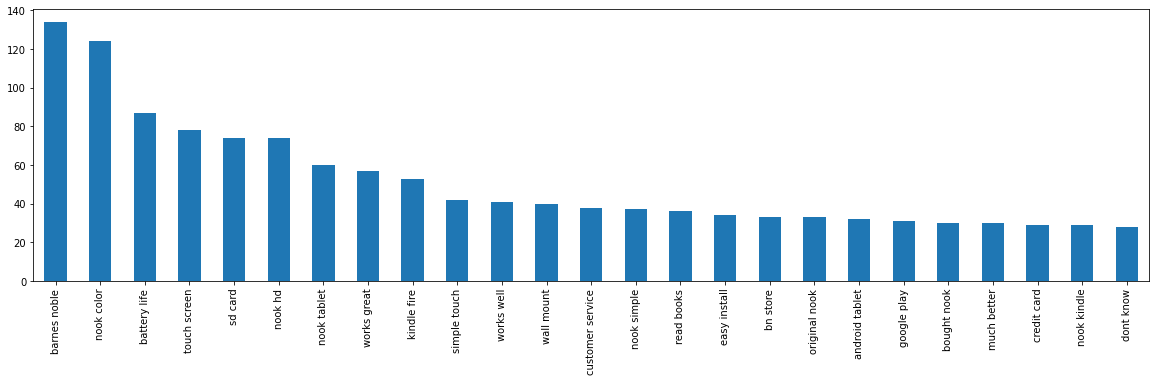

In [ ]:
#creating a bi-gram for the reviews
model = CountVectorizer(ngram_range=(2,2)) # Create a model
sparse_matrix = model.fit_transform(docs_clean) # Fit the data to the model
dtm = pd.DataFrame(sparse_matrix.toarray(), columns=model.get_feature_names())

dtm.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In [ ]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud

In [ ]:
text_col

0      we got this gps for my husband who is an otr o...
1      im a professional otr truck driver and i bough...
2      well what can i say  ive had this unit in my t...
3      not going to write a long review even thought ...
4      ive had mine for a year and heres what we got ...
                             ...                        
994    a cable runs lifetime excellent product that i...
995    quality of connection and video seems good wit...
996    what is there to say  i needed a cable to run ...
997    i can find nothing wrong with this cable  it w...
998    works perfectly at p hd and in all other canon...
Name: reviewText, Length: 999, dtype: object

In [ ]:
reviews_combined = " ".join(text_col.values)

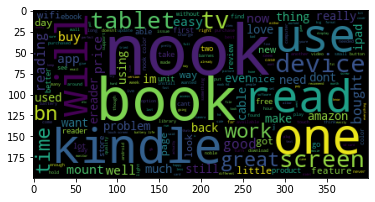

In [ ]:
#creating a word-cloud for the reviews
import matplotlib.pyplot as plt
word_cloud = WordCloud().generate(reviews_combined)
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [ ]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [ ]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

In [ ]:
df_dist.sort_values(ascending=False,by="freq").head(25)

,words,freq
12,the,7819
15,,4665
76,to,4418
84,and,4201
87,i,3981
23,a,3908
21,it,3183
8,is,2450
4,for,2093
31,of,1971


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [ ]:
# You code here (Please add comments in the code):
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create a TfidfVectorizer object with stop words removed
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')

# Fit and transform the cleaned document data using the TfidfVectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(docs_clean)

# Get the feature names from the TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names()

feature_scores = tfidf_matrix.sum(axis=0).tolist()[0]

features_with_scores = list(zip(feature_names, feature_scores))

sorted_features = sorted(features_with_scores, key=lambda x: x[1], reverse=True)

sorted_features_df = pd.DataFrame(sorted_features, columns=['term', 'cumulative_TF-IDF'])

print(sorted_features_df)





                 term  cumulative_TF-IDF
0                nook          48.019443
1                  tv          35.867572
2               great          29.464505
3               mount          26.265322
4               works          25.577174
...               ...                ...
9278      webbrowsing           0.030455
9279  wellimplemented           0.030455
9280        wellissue           0.030455
9281           winamp           0.030455
9282        youtubeif           0.030455

[9283 rows x 2 columns]


C:\Users\jivit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Question 4 (10 points): Write python code to rank the text based on text similarity. Based on the text data you used for question 2, design a query to match the most relevant docments. Please use the BERT model to represent both your query and the text data, then calculate the cosine similarity between the query and each text in your data. Rank the similary with descending order. 

In [4]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

# Load pre-trained SentenceTransformer model
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Define your query
query = "GPS for truck drivers"

# Load your text data from a CSV file
data = pd.read_csv("amazon_reviews.csv")["reviewText"].tolist()

# Calculate SentenceTransformer embeddings for both query and text data
query_embedding = model.encode([query])[0]
text_embeddings = model.encode(data)

# Calculate cosine similarity between query and text data
similarities = util.pytorch_cos_sim(query_embedding, text_embeddings)

# Convert tensor to numpy array and flatten it
similarities = similarities.cpu().detach().numpy().flatten()

# Sort the text data based on the similarity scores in descending order
ranking = np.argsort(similarities)[::-1]

# Print the top 5 most relevant texts based on the similarity scores
for i in range(5):
    print(f"Rank {i+1}: {data[ranking[i]]}")

Rank 1: We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!
Rank 2: Well, what can I say.  I've had this unit in my truck for about four days now.  Prior to that I had a Garmin 755T non-truck GPS.  One of my favorite features in that unit was the

In [2]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=2ab636a0e9c6e89e51e5be3245db86ffb95113b170a321a322e23099c72ff529
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers
